### Dataset pulled from Kaggle (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Data Cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Information about Features:
- Gender: Male or Female
- Age: Age of patient
- Hypertension: 1- Yes, 0- No
- Heart Disease: 1- Yes, 0- No
- Ever Married: Yes or No
- Work Type: Private or Self-employed
- Residence Type: Rural or Urban
- Avg Glucose Level: Average glucose level
- BMI: Body Mass Index (<18.5 = Underweight, 18.5-24.9 = Normal Weight, 25-29.9 = Overweight, >30 = Obese)
- Smoking Status: Smokes, Formerly Smoked, Never Smoked
- Stroke: 1- Yes, 0- No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna(how='any',axis=0) 

In [7]:
df['hypertension'].value_counts() 

0    4458
1     451
Name: hypertension, dtype: int64

In [8]:
df['heart_disease'].value_counts() 

0    4666
1     243
Name: heart_disease, dtype: int64

In [9]:
df['ever_married'].value_counts() 

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [10]:
df['work_type'].value_counts() 

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df['Residence_type'].value_counts() 

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [12]:
df['smoking_status'].value_counts() 

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [13]:
#remove observations where smoking_status is unknown
df = df[df['smoking_status'] != 'Unknown']

In [14]:
df['smoking_status'].value_counts() 

never smoked       1852
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [15]:
df['stroke'].value_counts() 

0    3246
1     180
Name: stroke, dtype: int64

# Feature Engineering

In [16]:
#create a list of conditions
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >=18.5) & (df['bmi'] <= 24.9),
    (df['bmi'] >=25) & (df['bmi'] <=29.9),
    (df['bmi'] >= 30)
]

#create list of values we want to assign for each condition
values =['underweight', 'normal', 'overweight', 'obese']

df['bmi_class'] = np.select(conditions, values)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,overweight


In [18]:
#dummy variables
gender = pd.get_dummies(df.gender).iloc[:, 1:]
ever_married = pd.get_dummies(df.ever_married).iloc[:, 1:]
work_type = pd.get_dummies(df.work_type).iloc[:, 1:]
residence_type = pd.get_dummies(df.Residence_type).iloc[:, 1:]
smoking_status = pd.get_dummies(df.smoking_status).iloc[:, 1:]
df_stroke = pd.concat([df, gender, ever_married, work_type, residence_type, smoking_status], axis = 1)

# EDA

In [19]:
import seaborn as sns

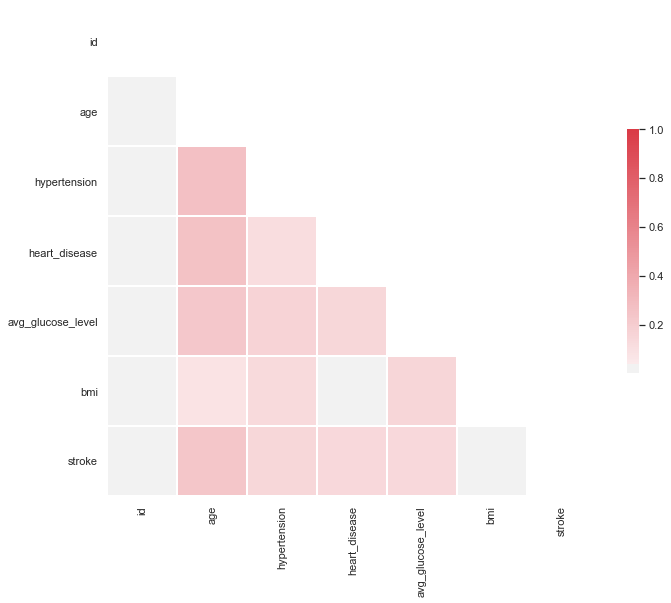

In [20]:
sns.set(style="white")  #using a heat map to display the visuals for the correlations in the dataset
# Compute the correlation matrix
corr = np.abs(df.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

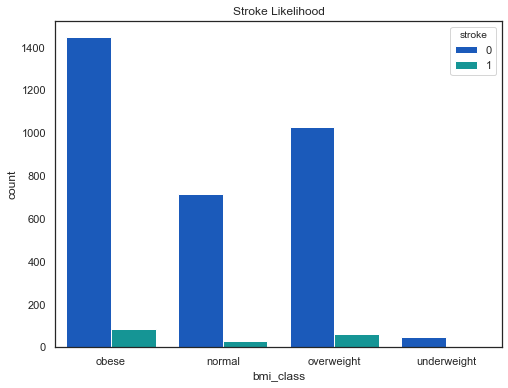

In [21]:
#Multiple Bars Bar Chart of Inflight Entertainment compared to Satisfied/Dissatisfied customers
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df['bmi_class'], hue=df.stroke, palette = "winter")
ax.set_title("Stroke Likelihood")
plt.show()

In [22]:
#correlation every column has with Tier
df[df.columns[1:]].corr()['stroke'][:]

age                  0.242495
hypertension         0.143647
heart_disease        0.138553
avg_glucose_level    0.140453
bmi                  0.011673
stroke               1.000000
Name: stroke, dtype: float64

# Modeling

In [23]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese,1,0,1,0,1,0,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese,1,0,1,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese,0,0,1,0,1,0,0,1,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal,0,0,1,0,0,1,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,overweight,1,0,1,0,1,0,0,1,0,0


In [26]:
#Create new df with important features
df_stroke = df_stroke[['hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'Male', 'Other', 'Yes', 
                       'Never_worked', 'Private', 'Self-employed', 'children', 'Urban', 'never smoked', 'smokes']]

In [27]:
target = df_stroke['stroke']
features = df_stroke.drop(['stroke'], axis=1)

In [28]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [29]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### Dummy Classifier

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
#create dummy classifier baseline model
dummy = DummyClassifier(strategy='stratified', random_state=1)

In [32]:
dummy.fit(X_train, y_train)

dummy_preds = dummy.predict(X_test)
dummy_preds_train = dummy.predict(X_train)

dummy_f1 = metrics.f1_score(y_test, dummy_preds, average='weighted')
dummy_f1_train = metrics.f1_score(y_train, dummy_preds_train, average='weighted')

dummy_acc = metrics.accuracy_score(y_test, dummy_preds)
dummy_acc_train = metrics.accuracy_score(y_train, dummy_preds_train)

dummy_precision = metrics.precision_score(y_test, dummy_preds, average='weighted')
dummy_precision_train = metrics.precision_score(y_train, dummy_preds_train, average='weighted')


print('Train Accuracy score: ', dummy_acc_train)
print('Train F1 score: ', dummy_f1_train)
print('Train Precision score: ', dummy_precision_train)
print('Test Accuracy score: ', dummy_acc)
print('Test F1 score: ', dummy_f1)
print('Test Precision score: ', dummy_precision)

Train Accuracy score:  0.9105839416058394
Train F1 score:  0.9080615672374267
Train Precision score:  0.9055650337678327
Test Accuracy score:  0.8892128279883382
Test F1 score:  0.8782348918403341
Test Precision score:  0.8675247102325251


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(metrics.confusion_matrix(y_test, dummy_preds))

[[610  30]
 [ 46   0]]


In [35]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,dummy_preds)
classes = ['No Stroke', 'Stroke']

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[610  30]
 [ 46   0]]


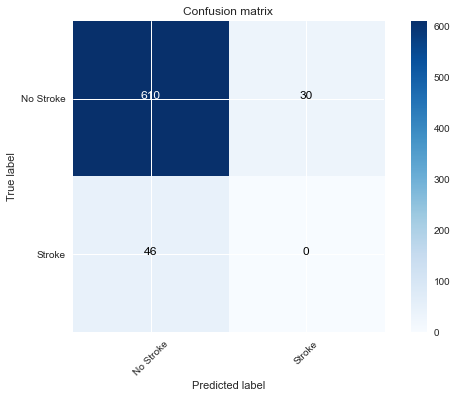

In [37]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Handling Class Imbalance w/ SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:

sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [61]:
def fit_predict(model, x_train, y_train, test):
    model.fit(x_train, y_train)
    predictions = model.predict(test)
    # checking accuracy
    print('Test Accuracy score: ', accuracy_score(test, prediction))

    # checking accuracy
    print('Test F1 score: ', f1_score(test, predictions))


In [62]:
lr = LogisticRegression(solver='liblinear')

In [64]:
#smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')

#smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)

#smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.5102040816326531
Test F1 score:  0.08695652173913043


In [66]:
print(metrics.confusion_matrix(y_test, smote_pred))

[[334 306]
 [ 30  16]]


In [67]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,smote_pred)
classes = ['No Stroke', 'Stroke']

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[334 306]
 [ 30  16]]


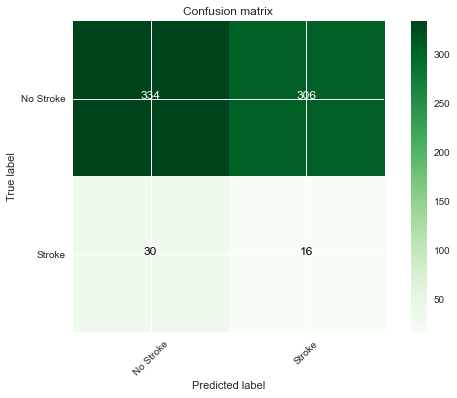

In [72]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

### Upsampling Minority Class

In [73]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [74]:
# separate minority and majority classes
no_stroke = training[training.stroke==0]
stroke = training[training.stroke==1]

In [75]:
# Get a class count to understand the class imbalance.
print('no_stroke count: '+ str(len(no_stroke)))
print('stroke count: '+ str(len(stroke)))

no_stroke count: 2606
stroke count: 2606


In [76]:
from sklearn.utils import resample


In [77]:
# upsample minority
stroke_upsampled = resample(stroke,
                          replace=True, # sample with replacement
                          n_samples=len(no_stroke), # match number in majority class
                          random_state=23) # reproducible results

In [78]:
stroke_upsampled.shape

(2606, 15)

In [79]:
# combine majority and upsampled minority
upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
upsampled.stroke.value_counts()

1.0    2606
0.0    2606
Name: stroke, dtype: int64

### Logistic Regression

In [80]:
upsampled.isnull().sum()

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
Male                 0
Other                0
Yes                  0
Never_worked         0
Private              0
Self-employed        0
children             0
Urban                0
never smoked         0
smokes               0
stroke               0
dtype: int64

In [81]:
upsampled = upsampled.dropna(how='any',axis=0) 

In [82]:
from sklearn.linear_model import LogisticRegression

# trying logistic regression again with the balanced dataset
y_train = upsampled.stroke
X_train = upsampled.drop('stroke', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))



Test Accuracy score:  0.4970845481049563
Test F1 score:  0.054794520547945195
